# Ross Downey - Machine Learning & Statistics

# ATU - Winter 2022

## Models - Exercises

### Exercise 2.1
***
<br><br>
Use numpy and matplotlib to plot the absolute value function. <br>

Research and explain why the absolute value function is not typically used in fitting straight lines to data.
***


### Background
The purposes of this exercise is to plot the linear regression model using numpy and matplotlib. <br>
Instead of using the sum of least squares method, this plot will involve the use of absolute values <br>
for calculating the cost.<br>
An explanation will be provided as to why this is not the typical approach <br>
***

In [1]:
# Import matplotlib, scipy and numpy
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np

# Changing default size of plots for better presentation
plt.rcParams['figure.figsize'] = (8, 6)

## Example
Preferrable to use an example of a real world activity instead of just pure numbers to outline. <br>
In this case a pharmaceutcial laboratory analyst is preparing a set of calibration standards <br>
for use in quantifying a set of drug substance samples with possible impurities. <br>
The analyst creates a set of standards in the range of 0 to 100ppm (parts per million) in increments of 5ppm.<br>
The analyst can then run samples, of unknown concentration, and quantify these samples using the calibration plot.

In [2]:
# Generate plot using numpy
# x-axis values will be the calibration standard's concentration (input variables)
# y-axis values will be the measured response of these standards in Au (Absorbance units, arbitrary) (measured variable)

# stds array up to 100ppm in increments of 5ppm
stds = np.arange(0.0, 100, 5.0)
# results array (in absorbance units, au)
# 20 is slope, 0.1 is y-intercept
# Noise is introduced as not all measurments are 100% accurate, instrument variations, preparation variations etc.
# Mean of 0.0 for noise, std deviation of 20.0 and 20 values
au = 20 * stds + 0.1 + np.random.normal(0.0, 40.0, stds.size)

In [3]:
stds

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80., 85., 90., 95.])

In [4]:
au

array([   9.01844523,   98.51318825,  254.46392227,  278.58310653,
        407.9440515 ,  594.32014926,  591.93895525,  691.4339485 ,
        818.4878704 ,  884.97108549, 1019.20474367, 1042.4856672 ,
       1158.97464307, 1282.06368564, 1320.23354151, 1490.33076134,
       1613.94730491, 1757.61795061, 1857.32006368, 1919.03733552])

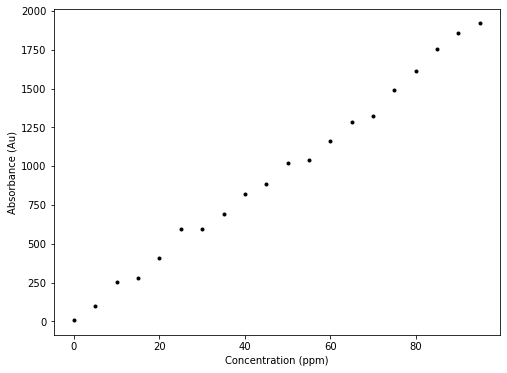

In [5]:
# Plotting for visual understanding

plt.plot(stds, au, 'k.')

# Axis labels for clarity
plt.xlabel('Concentration (ppm)')
plt.ylabel('Absorbance (Au)')

# Show the plot.
plt.show()

A straight line will now be fitted over the model using the equation of line from the generated data.<br>
There are numerous options for fitting a straight line but in this case it is sufficient to plot one.<br>
The equation of the line in this case (ignoring the random noise) is y = 20x + 0.1

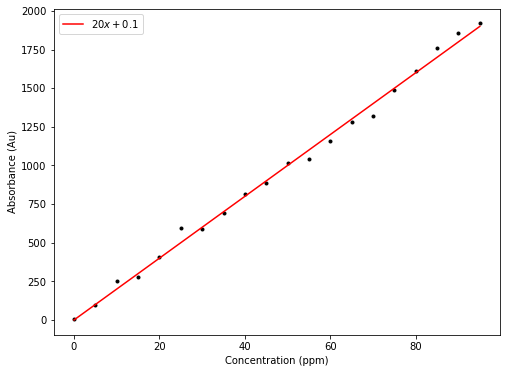

In [6]:
# Plot above data again
plt.plot(stds, au, 'k.')

# Overlay line of best fit on the plot.
x = np.arange(0.0, 100.0, 5.0)
plt.plot(x, 20.0 * x + 0.1, 'r-', label=r"$20x + 0.1$")


# Add a legend.
plt.legend()

# Axis labels for clarity
plt.xlabel('Concentration (ppm)')
plt.ylabel('Absorbance (Au)')

# Show the plot.
plt.show()

The addition of the straight help to visually confirm the linear relationship between the two sets of data <br>
However, as some noise was added to each dependent y-value each data point does not fit perfectly on the line <br>
In the real world this is typcial, and a line of best fit is applied i.e. which line suits the data <br>
so that there are an equal number of datapoints above and below the line with equal distances between points and line. <br>
***


Of course, this line of best fit can also be calculated mathematically instead of visually estimating. <br>
In this calculation the vertical distance between datapoint and the line are calculated / measured <br>
This distance is then squared and applied to a formula to ascertain the "best" values of m(slope) and c (y-intercept). <br>
These values are known as the parameters and are used to determine the best model.<br>
This method of squaring the values is know as the least squares method and is done for a number of reasons <br>
These will be discussed below. <br>
For the purposes of this exercise instead of squaring the residual difference between points and line <br>
the absolute value will be employed instead of squaring. <br>
This can bring up some difficulties and challenges which will also be discussed below.
The best parameter values are known as the cost.
***


In [7]:
# Calculating the cost using absolute values (note no squaring of residuals)
cost = lambda m,c: np.sum([(au[i] - m * stds[i] - c) for i in range(stds.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (20.0, 0.1, cost(20.0, 0.1)))

Cost with m = 20.00 and c =  0.10:    88.89


Issue already seen with using the absolute values is the presence of a negative cost. <br>
As we are not squaring the residual values some negative values will be seen <br>
Squaring the residuals removes all negative values <br>
***

The actual best values for slope and y-intercept can be calculated using the below code

In [8]:
# Calculate the best values for m and c.

# Need mean values of each dataset.
stds_avg = np.mean(stds)
au_avg = np.mean(au)

# Subtract means from each variable
stds_zero = stds - stds_avg
au_zero = au - au_avg

# Best value for m
m = np.sum(stds_zero * au_zero) / np.sum(stds_zero * stds_zero)

# Use m from above to calculate the best c.
c = au_avg - m * stds_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 19.926526 and c is 8.034530.


The above implies that the actual best line to fit the data is y = m(19.83) + 4.65. <br>
Note: removing the square values from the best value for m calculation led to a code error. <br>
This is because it was trying to divide by zero in some cases. Another flaw in the absolute values method. <br>
***

Numpy also has a function called polyfit which will determine the best parameter values

In [9]:
np.polyfit(stds, au, 1)

array([19.92652613,  8.03452974])

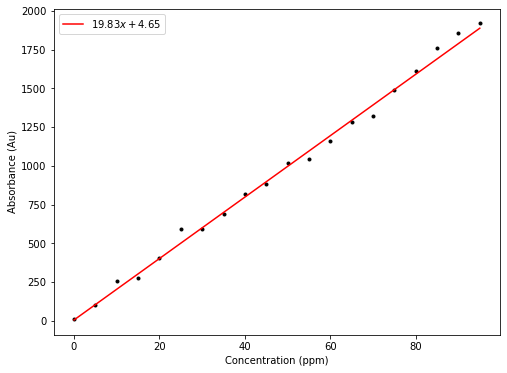

In [10]:
# Plot above data again
plt.plot(stds, au, 'k.')

# Overlay line of best fit on the plot, using best values determined
x = np.arange(0.0, 100.0, 5.0)
plt.plot(x, 19.83 * x + 4.65, 'r-', label=r"$19.83x + 4.65$")


# Add a legend.
plt.legend()

# Axis labels for clarity
plt.xlabel('Concentration (ppm)')
plt.ylabel('Absorbance (Au)')

# Show the plot.
plt.show()

## Issues with using absolute values

There are a few issues with using absolute values instead of the least squares method <br>
As mentioned above, using the absolute values leaves negative values for some of the residual values <br>
Squaring these removes the negative values. <br>
If we were to use the absolute values then we would have positive and negative values in our assessment. <br>
These could then start to cancel each other out leading to a less accurate calculation of the m value <br>
where the sum of all is used [1].
Another benefit of the least squares method is that each difference is, in a way magnified, <br>
by squaring the value. This helps us to determine the best parameters in a more accurate manner <br>
as the error has been increased.<br>
In terms of mathemtically calculating the best value of m the differentiation of certain values is needed <br>
where the first derivative is set equal to zero. <br>
This cannot be done using calculus, but can be done by estimating best fit values and measuring the resiudals.<br>
From this it can be stated that the least squares method is a much simpler way of measuring the best parameter<br>
values of a linear plot.

## Exercise 2.2
***

Fit a straight line to the following data points, using all three line fit methods

Is a straight line a good model for these points?

In [11]:
# Data points

x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

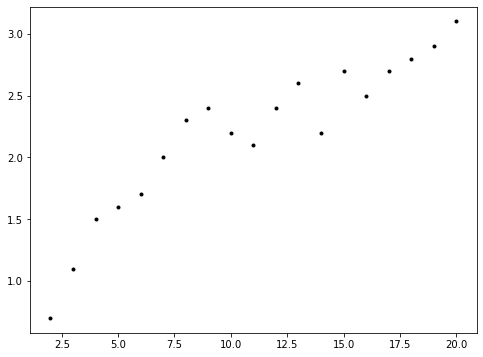

In [12]:
# First thing to do is to plot them so as to get an initial visual representation
# Plot, no requirement for labels as data is just numbers

plt.plot(x, y, 'k.')

# Show the plot.
plt.show()

Initial impression of data is that it may be linear but could also be something else such as logarithmic where y values tend to plateau with increasing values of x. Fitting linear models on this data should help determine this.<br>
As discussed previously if the data is linear then it will "follow" the formula y = m*x + c.<br>
Assessing the correlation coefficient will help us determine if the data is linear or tends to be linear.
***

In [13]:
# First perform a rough calculation (Y2-Y1/X2-X1) to give us an approximation of the slope from two data points
# X1 = 3.0, Y1 = 1.1, X2 = 19.0, Y2 = 2.9

slope_guess = ((2.9-1.1)/(19.0-3.0))
slope_guess

0.11249999999999999

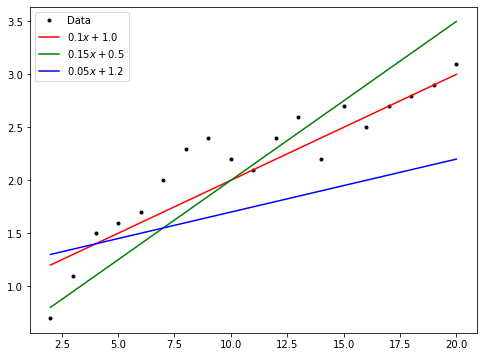

In [14]:
# Can use this estimation of slope as a starting point
# Can look at visual plot above to guess y-intercept.
# Converting arrays to numpy arrays

x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

# Plot
plt.plot(x, y, 'k.', label="Data")

plt.plot(x, 0.1 * x + 1.0, 'r-', label=r"$0.1x + 1.0$")
plt.plot(x, 0.15 * x + 0.5, 'g-', label=r"$0.15x + 0.5$")
plt.plot(x, 0.05 * x + 1.2, 'b-', label=r"$0.05x + 1.2$")

# Add a legend.
plt.legend()

# Show the plot.
plt.show()

Plenty of variance in the three estimations of the line equation. <br>
Closest line of best fit could be the green or the red.<br>
For the purposes of this exercises I will select the green line as a start point <br>
Our first estimation of the equation of the line is therefore y = 0.15*x + 0.5 <br>
will now move onto models to get the best values of the slope and y-intercept i.e. lowest cost.<br>
***

In [15]:
# Using numpy's polyfit function to give "best" values of m and c
m_poly, c_poly = np.polyfit(x, y, 1)
m_poly, c_poly

(0.1031578947368421, 1.0494736842105261)

Numpy's polyfit applies mathematical calculations to determine optimum values of m and c.<br>
In this case the values for slope and y-intercept that give the lowest cost are 0.10315789 and 1.04947368 respectively. <br>
Will now plot the straight line applying these values

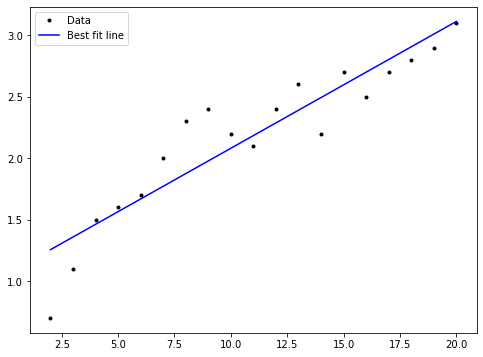

In [16]:
# Plot with polyfit values
plt.plot(x, y, 'k.', label='Data')
plt.plot(x, m_poly * x + c_poly, 'b-', label='Best fit line')

# Add legend.
plt.legend()

# Show the plot.
plt.show()

In [17]:
# Demonstrate cost values using the polyplot.
print("Cost with m = %5.4f and c = %5.4f: %8.2f" % (m_poly, c_poly, cost(m_poly, c_poly)))

Cost with m = 0.1032 and c = 1.0495: 18971.90


A straight line can be made to fit the data but the residual values are quite large in some cases<br>
Also, the cost value seems to be high. <br>
Will now proceed to optimise the model using scipy stats

In [18]:
# optimise function taken from scipy (refuse to use American spelling!)
import scipy.optimize as so

x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

In [19]:
# Need cost function that we can include when using the minimise function on scipy.optimise
# Need to add two values for m and c into one so scipy.mimise can be utilised

def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [20]:
# test
cost((0.1032, 0.1049))

17.97512899

In [21]:
#  Reference [2]
result = so.minimize(cost, (0.1032, 0.1049))
# Show the results.
result

      fun: 1.0395789473685495
 hess_inv: array([[ 0.00546959, -0.07258755],
       [-0.07258755,  0.99502192]])
      jac: array([ 6.00516796e-06, -2.80141830e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([0.10315789, 1.04947363])

In [22]:
# Take out optmised values for m and c only
m_opt, c_opt = result.x
m_opt, c_opt

(0.10315789232014166, 1.0494736295144487)

In [23]:
# Recall polyfit values of m and c
m_poly, c_poly = np.polyfit(x, y, 1)
m_poly, c_poly

(0.1031578947368421, 1.0494736842105261)

As can be seen above both values are very similar to each other<br>
Another option is to use scipy's curve fitting function to get the optimum values for m and c.<br>
***

In [24]:
# Reference [3]

# Create the model function.
def fit(x, m, c):
    return m * x + c

In [25]:
# Run curve_fit.
result_fit = so.curve_fit(fit, x, y)
result_fit

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [26]:
# Extract values from curve fit results
m_fit, c_fit = result_fit[0]
m_fit, c_fit

(0.10315789458399933, 1.0494736859688867)

We now have three different "optimum" values for slope and y-intercept from the data. <br>
We can overlay the the three straight lines to demonstrate their similarities visually. <br>
***

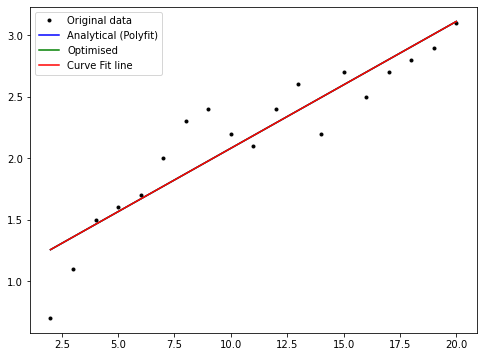

In [27]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_poly * x + c_poly,'b-', label='Analytical (Polyfit)')
ax.plot(x, m_opt * x + c_opt, 'g-', label='Optimised')
ax.plot(x, m_fit * x + c_fit, 'r-', label='Curve Fit line')
ax.legend()

# Show the plot.
plt.show()

The three lines are so close together they are indistinguishable from each other on the plot<br>
This indicates that for the purposes of this exercise all three methods will give the same results <br>
In cases where there are a lot more data points, or maybe more than two variables, then the <br>
methods may give different results and the "best" one would have to be determined.<br>
***


Applying the linear model to the above two arrays may not be the best approach<br>
Looking at the arrays it appears that the y values seem to be reaching a limit when x increases. <br>
This indicates that the data may indeed be logarithmic and not linear.<br>
A quick calculation of Pearson's correlation coefficent will give us a better idea [4] <br>


In [28]:
# Using numpy to calculate correlation
np.corrcoef(x, y)[0][1]**2

0.8536888888888888

The above value of 0.85 for Pearson's correlation co-efficient indicates that the data is not linear.<br>
While there is no set "specification" for this value the fact that it is some distance from 1.0 <br>
(A 1.0 value would indicate a perfect linear relationship between x and y) <br>
is telling us that the two arrays do not have a linear relationship and an alternative plot should be applied <br>

## References
[1] https://www.bradthiessen.com/html5/docs/ols.pdf
[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
[3] https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
[4] https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

***
# End